<p style="text-align: center">
<img src="../../assets/images/dtlogo.png" alt="Duckietown" width="50%">
</p>

# Image manipulation

This notebook introduces some simple image manipulation techniques.

We will cover
1. Loading and visualizing images
2. Cropping images
3. Modifying images

This will prepare us to filter images for objects such as duckies.

First though, we need to do some setup work. This sets up autoreloading of code in external files and loads packages we will need later.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import duckietown_code_utils as dcu

%matplotlib inline
%pylab inline

DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /usr/local/lib/python3.8/dist-packages


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Loading and visualizing images

Here is a function that converts a JPEG image's bytes to a Numpy `nd.ndarray`.

In [2]:
fn = '../../assets/samples/big-duck/big-duck-08.jpg'
image1 = dcu.rgb_from_jpg_fn(fn)

We can see the shape with the attribute "shape":


In [3]:
image1.shape

(480, 640, 3)

Note that the convention is (height, width, depth). Here we have an image of height 480 and width 640. The depth represents R, G, B color channels.

Using `dtype` we can check the datatype for the image. In this cases, it is `uint8` (from 0 to 255)

In [4]:
image1.dtype

dtype('uint8')

We can display the image using `imshow()`.

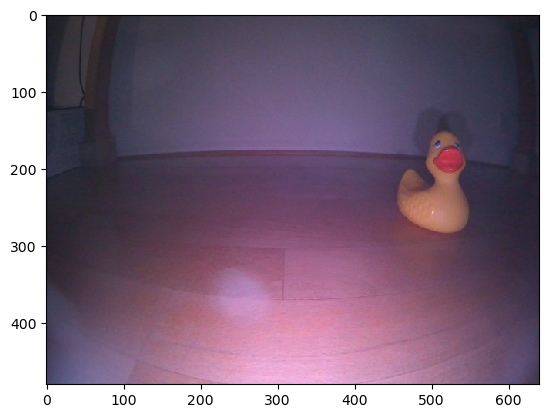

In [5]:
plt.imshow(image1);

## Cropping images

You can manipulate the image by using multidimensional array notation.


For example, we can obtain a smaller image by cropping it.

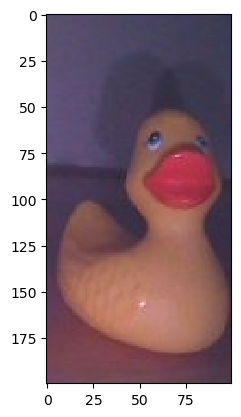

In [6]:
image1_cropped = image1[100:300, 450:550, :]
plt.imshow(image1_cropped);

In the expression `image1[100:300, 450:550, :]` we selected a part of the image using slice notation. The notation `100:300` means taking the pixels from 100 to 300 in the first coordinate (vertical, starting from top); `450:550` means getting the pixels from 450 to 550 starting in the second coordinate (horizontal, starting from left).

Try updating `image1_cropped` so that it only contains the duckie.

We can also look at each color channel in isolation.

In [7]:
# Break out each color channel
R = image1[:,:,0]
G = image1[:,:,1]
B = image1[:,:,2]

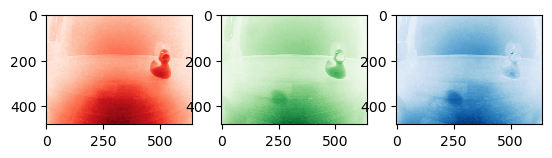

In [8]:
# Visualize with color mappings
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(R, cmap="Reds")
axarr[1].imshow(G, cmap="Greens")
axarr[2].imshow(B, cmap="Blues")
plt.show()

We can also obtain a grayscale image using the `np.mean` function, by taking the mean around the last coordinate.


In [ ]:
grayscale = np.mean(image1, axis=2)
plt.imshow(grayscale, cmap='gray');
grayscale.shape

## Modifying the image

Finally, we can use array notation to change the image.

For example, let's create a copy of the image and draw a line on it.

In [ ]:
image1_copy = image1.copy()

image1_copy[128:140, 400:500, 0] = 255

plt.imshow(image1_copy);

Note that when we used `image1_copy[128:140, 400:500, 0] = 255` we set the first color channel of a bunch of cells in the array to 255.

We specified those with first (vertical) coordinate 128 to 140 and with second (horizontal) coordinate 400 to 500. Then, the 0 means that we set the first component of the depth: the red color channel.

Another example: we can make a yellow box as follows.


In [ ]:
image1_copy[300:400, 200:300, :] = (255,255,0)
plt.imshow(image1_copy);

In this case, we selected with `[300:400, 200:300, :]` all RGB components of those pixels (`:`) and we set them to yellow `(255,255,0)`.

## Activity

- Make another copy of the image (or load your own image).
- Draw a blue rectangle.
- Copy the upper right corner of the image and paste it to the lower-left corner.

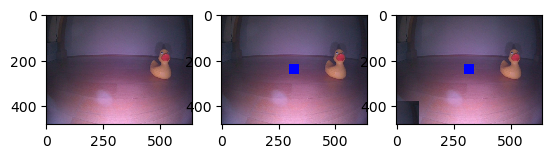

In [19]:
# TODO: Complete the activity here
i1_copy2 = image1.copy()
ff, axaff = plt.subplots(1, 3)
axaff[0].imshow(i1_copy2)

i1_copy2[220:260,300:340,:]=(0,0,255)
axaff[1].imshow(i1_copy2)

i1_copy2[379:479,0:100,:]=i1_copy2[0:100,539:639]
axaff[2].imshow(i1_copy2)

----

Now go on to the [second notebook](../02-Image-Filtering/braitenberg02.ipynb).
